<h1>Lab 1: Linear Regression : Training One Parameter</h1>

In this practice session, you are invited to train two linear regression models using gradient descent method. The first one on a simulated that you create and the second on a real data.

<h2>Preparation</h2>

The following are the libraries we are going to use for this lab: **numpy** supports matrix operation and **matplotlib** library plots the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp

The class <code>plot_diagram</code> helps us to visualize the data space and the parameter space during training

In [2]:
# The class for plotting

class plot_diagram():
    
    # Constructor
    def __init__(self, X, Y, theta_1, stop, go = False):
        start = theta_1
        self.error = []
        self.parameter = []
        self.X = X
        self.Y = Y
        self.parameter_values = np.arange(start, stop)
        self.Loss_function = [cost(predict(X,theta_1), Y) for theta_1 in self.parameter_values] 
        theta_1 = start
        
    # Executor
    def __call__(self, Yhat, theta_1, error, grad, n):
        self.error.append(error)
        self.parameter.append(theta_1)
        plt.figure(figsize=(8,9))
        plt.subplot(212)
        plt.plot(np.sort(self.X,axis=0),Yhat[np.argsort(self.X,axis=0),0])
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        #plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        plt.plot(self.parameter_values, self.Loss_function)   
        plt.plot(self.parameter, self.error, 'ro')
        plt.quiver(theta_1,error,1/(1+exp(grad))-0.5,(1/(1+exp(grad))-0.5)*grad,color='red',scale=0.5,scale_units='xy',angles='xy')
        plt.xlabel("B")
    
    # Destructor
    def __del__(self):
        plt.close('all')

## Part 1: Simulated Data

<h3 id="Makeup_Data">Make Some Data</h3>

**Question 1:**
- Use [<code>numpy.arange</code>](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.arange.html) to generate values from -3 to 3 with a step of 0.1 in the variable X. 
- Use [<code>numpy.shape</code>](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.shape.html) to visualize the size of X.
- Use X to create $f = -3X$ a line with a slope of -3. This is the line you will estimate.

In [3]:
# Generate values from -3 to 3 with a step of 0.1
# Type your code here
X = np.arange(-3,3,0.1,dtype = float)
X

array([-3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01,  2.66453526e-15,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01,
        1.00000000e+00,  1.10000000e+00,  1.20000000e+00,  1.30000000e+00,
        1.40000000e+00,  1.50000000e+00,  1.60000000e+00,  1.70000000e+00,
        1.80000000e+00,  1.90000000e+00,  2.00000000e+00,  2.10000000e+00,
        2.20000000e+00,  

In [4]:
X =X[:,np.newaxis] # we add np.newaxis in the indexing to obtain an array of shape (m,1) instead of (m,1)

# Print the shape of X
# Type your code here
print('The shape of X is: ', X.shape)

# Create the f(X) with a slope of -3
# Type your code here
f = -3*X  #  f(X) = aX+b The slope of the line is b, and a is the intercept


The shape of X is:  (60, 1)


Let us plot the line.

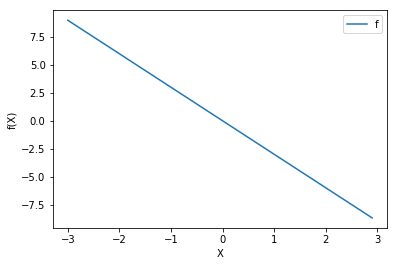

In [5]:
# Plot the line with blue

plt.plot(X, f, label = 'f')
plt.xlabel('X')
plt.ylabel('f(X)')
plt.legend()
plt.show()

**Question 2:** 
We want to add some noise to the data in order to simulate the real data. 
- Use [<code>numpy.random.randn</code>](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html) to generate Gaussian noise that is the same size as <code>X</code>.

In [6]:
X.shape

(60, 1)

In [7]:
# Generate the noise that is the same size as X
# Type your code here
noise = np.random.randn(X.shape[0],X.shape[1])
#print(noise)

In [8]:

# Add some noise to f(X) and save it in Y
Y = f + 0.5 * noise

Plot the output you want to predict <code>Y</code>: 

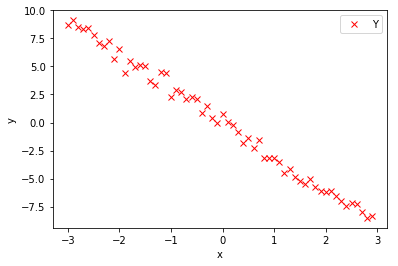

In [9]:
# Plot the data points

plt.plot(X, Y, 'rx', label = 'Y')

#plt.plot(X, f, label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [10]:
Y.shape

(60, 1)

On considère qu'on a que Y. On veut retrouver f. On choisit un modèle linéaire, et MSE va nous calculer l'erreur quadratique. On veut minimiser le coût de cette fonction, c'est pour ça qu'on cherche le gradient.

---
We consider that we only have Y and we want to predict f.
We choose a linear model, and we will compute the MSE (erreur quadratique)

We want to minimise the cost, and that is why we are looking for the gradient (derivative)

<h3 id="Model_Cost">Create the Model and Cost Function (Total Loss)</h3>

In this section, let us create the model and the cost function (total loss) we are going to use to train the model and evaluate the result.

**Question 3:** 
Define the linear model with <code>predict</code> function that returns $yhat=\theta_1*x$. (We will add the bias in the next lab.)

In [11]:
# Create predict function
def predict(x,theta_1):
    # Type your code here
    yhat = theta_1 * x
    return yhat 

**Question 4:** 
- Store in the variable m the number of samples.
- Define the criterion or cost function that returns the MSE (Mean Square Error): **Mean Squared Error (MSE)**: $$cost = \frac{1}{2~m} \sum_{i=1}^{m}{(yhat_i - y_i)^2}$$
**Hint:** For a vectorized implementation, use direct operation on arrays like $+,-, \times \dots$ You can also use [<code>numpy.dot</code>](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html), [<code>numpy.transpose</code>](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html) and [<code>numpy.sum</code>](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.sum.html) functions to calculate sums along vectors rather than using for loop. 

In [12]:
# Create the MSE function to evaluate the result.

def cost(yhat, y):
    # Type your code here
    m = y.shape[0]
    error = (yhat - y)**2
    cost = (1/2*m)* np.sum(error) # https://www.sharpsightlabs.com/blog/numpy-sum/
    return cost

Let us define the learning rate <code>lr</code> and an empty list <code>LOSS</code> to record the loss for each iteration:   

In [13]:
# Create Learning Rate and an empty list to record the loss for each iteration

lr = 0.1
LOSS = []

Now, we initialize the model parameter to learn.

In [14]:
theta_1 = -10.0

**Question 5:** 
- Store in the variable m the number of samples.
- Define the gradient of the cost function (Mean Squared Error) that returns: $\frac{d (cost)}{d \theta} = \frac{1}{m} \sum_{i=1}^{m}{(yhat_i - y)~x_i}$  
**Hint:** You can use the vectorized form: $\frac{d (cost)}{d \theta} =\frac{1}{m} x^T(yhat-y)$

In [15]:
# Create the gradient of the Mean Squared Error cost function

def grad_cost_func(theta_1, x, y):
    # Type your code here
    m = x.shape[0]
    gradient = 1/m*np.dot(np.transpose(x),(predict(x,theta_1)-y))
    return gradient

We create a <code>plot_diagram</code> object to visualize the data space and the parameter space for each iteration during training:

In [16]:
gradient_plot = plot_diagram(X, Y, theta_1 , stop= 5)

<h3 id="Train">Train the Model</h3>

#### Gradient descent algorithm
The gradient descent algorithm is a downhill iterative optimization method that uses the gradient direction as descending direction on each step to reach a local minimum. For a convex function, such as the MSE cost function, the gradient descent is guaranteed to reach a global minimum.  
The update equation of the optimization parameter $\theta$ is given by: $$\theta=\theta-lr \frac{d(cost)}{d \theta}$$
Where $lr:$ represents the step or the learning rate.

**Question 6:** Define a function for training the model by the gradient descent method using the following steps:
- Make a prediction of your data
- Calculate the loss 
- Compute the gradient of the loss
- Update the $\theta_1$ parameter using the formula above.

In [17]:
# Define a function for train the model

def train_model(theta_1,iter):
    for epoch in range (iter):
        
        # make the prediction
        # Type your code here
        Yhat = predict(X,theta_1)
        
        # calculate the cost
        # Type your code here
        loss = cost(Yhat, Y)
        
        # store the loss into list
        LOSS.append(loss)
        
        # Compute gradient of the loss
        # Type your code here
        grad=grad_cost_func(theta_1, X,Y)
        
        # plot the diagram for us to have a better idea
        gradient_plot(Yhat, theta_1, loss, grad, epoch)
        
        # update the theta_1 parameter
        # Type your code here
        theta_1 = theta_1 - lr*grad
        
    return theta_1

**Question 7:** Run 10 iterations of gradient descent and determine the optimal prediction of $\theta$

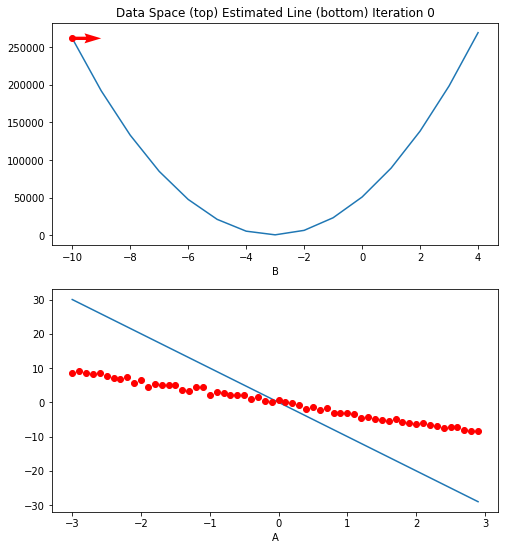

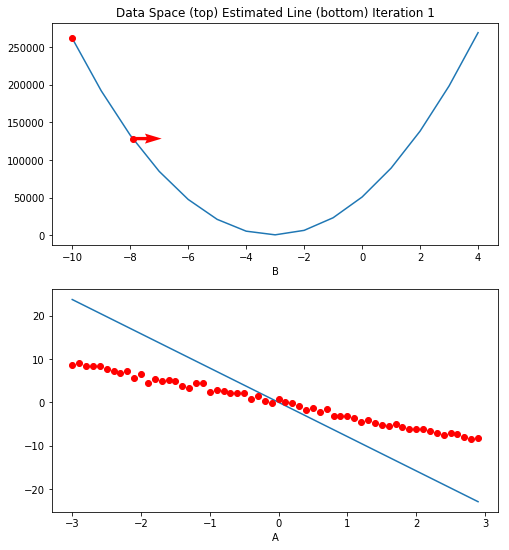

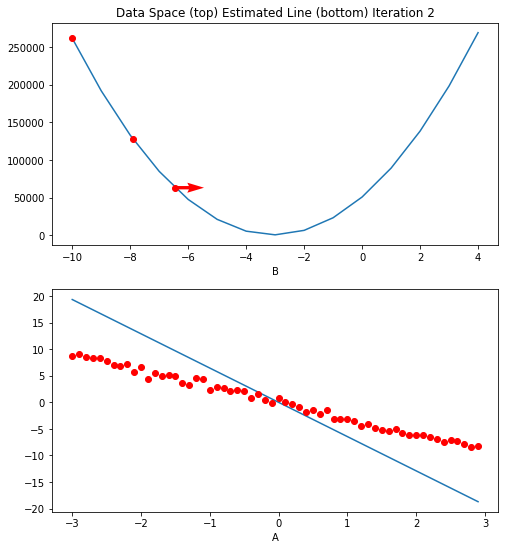

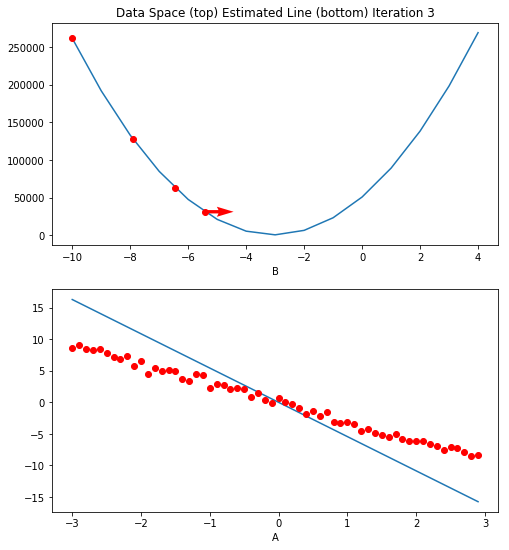

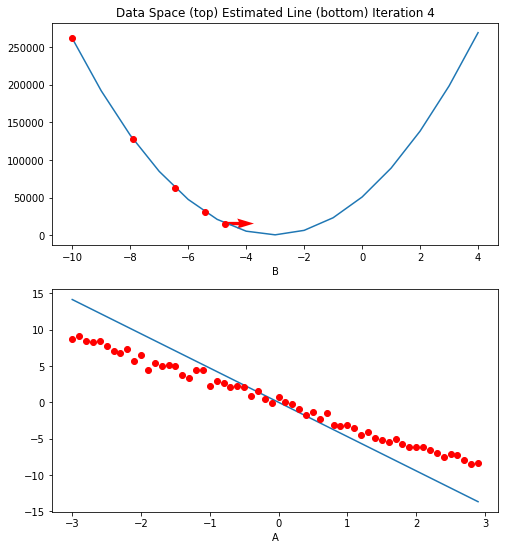

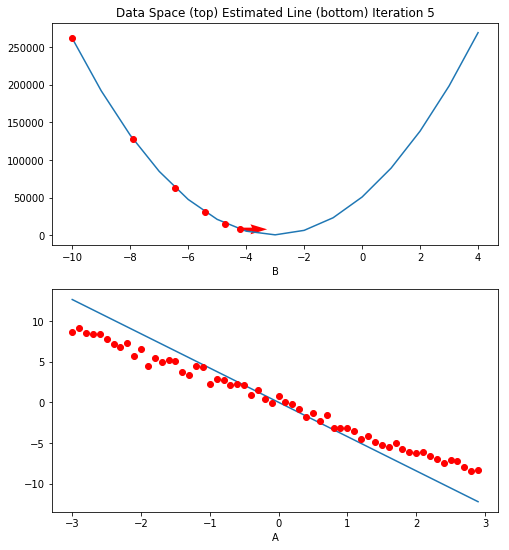

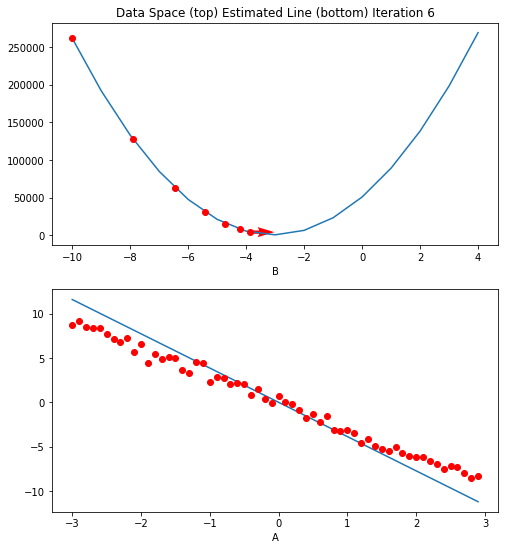

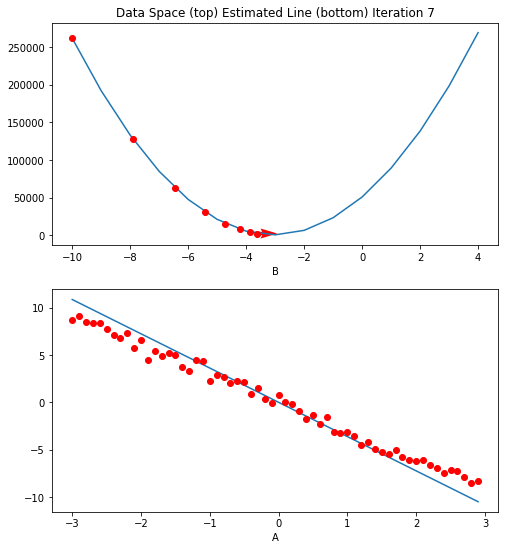

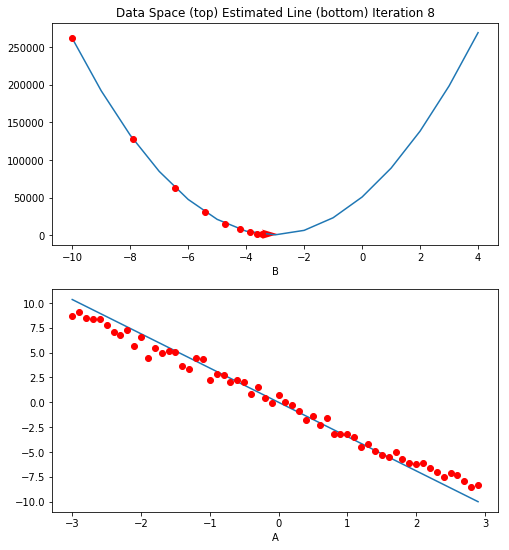

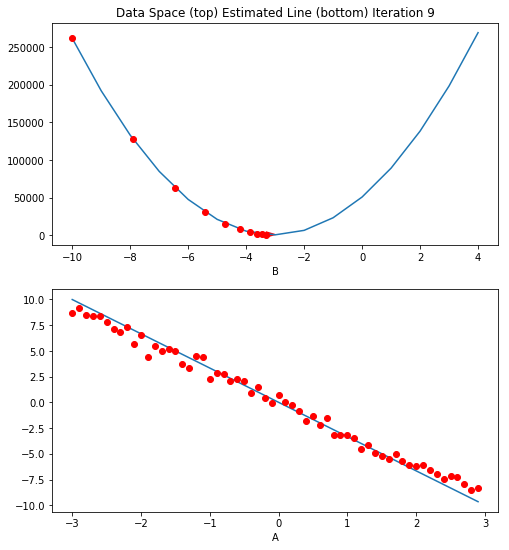

In [18]:
# Type your code here
theta_opt = train_model(theta_1,10)

The learning rate represents how fast we are descending.  
Gradient descent : 
At the first iteration, the derivative is negative. It indicates in which direction we have to go for the next iteration.  
In the last iteration, we have reached the minimum. (derivative = 0)

Plot the variation of loss for each iteration: 

Text(5.25,0.5,'Cost')

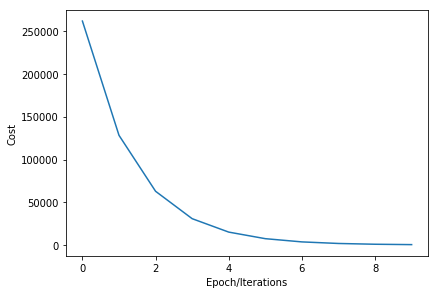

In [19]:
# Plot the variation of loss for each iteration

plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

The cost is increasing and we have a null value in the last iteration  -> we have minimized the function

**Question 8:** Print the optimal prediction of $\theta$ and the final loss:

In [20]:
# Type your code here
print("The optimal value of theta that minimize cost function is: ",theta_opt)
print('The final loss is: ',LOSS[-1])

The optimal value of theta that minimize cost function is:  [[-3.2455937]]
The final loss is:  847.3476132846923


<h2> Part 2: Real Data</h2>

Let us now consider real data and **predict houses prices in the region of *"Ile-de-France"* based on their areas** (i.e. price = f(area)).

**Question 1:** The *"house.csv"* file contains 3 columns that represent respectively **the area, the number of rooms and the price** of 600 houses (one per row). 
- Open this file with a file editor to examine the data. 
- Load the data in "house_data" variable. 
- Print the size of the data.  
**Hint:** You can use [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) function from numpy library.

In [21]:
# Load the data
# Type your code here
house_data = house_data= np.loadtxt("house.csv")

# Print the size of the data 
# Type your code here
print('The size of the data is: ', house_data.size)

The size of the data is:  1800


**Question 2:** 
- Determine the number of samples "m" in the input data "house_price".
- Extract the input feature and the output (what we are trying to predict) columns respectively in "X" and "Y" arrays.  
**Hint:** The shape of "X" and "Y" arrays should be (m,1) for the following questions and not (m,). You can use [newaxis numpy](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#basic-slicing-and-indexing) object to add a new axis as done in the question 1 of the first part.

In [22]:
# Extract the number of samples
# Type your code here
m = house_data.shape[0]
# number of features
n = 1  
#Extract the input feature X
# Type your code here
X =  house_data[:,0, np.newaxis]    # we add np.newaxis in the indexing to obtain an array 
print(X.shape)                      # with shape (600,1) instead of (600,)
#Extract the output Y (what we are trying to predict)
# Type your code here
Y = house_data[:,2, np.newaxis]     # we add np.newaxis in the indexing to obtain an array with shape (600,1) instead of (600,)

Y.shape

(600, 1)


(600, 1)

Let us plot the data.

Text(0.5,1,'house area vs price')

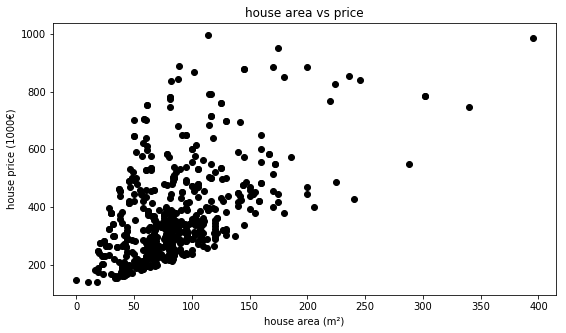

In [23]:
plt.figure("Visualize house data",figsize=(9,5))
plt.scatter(X, Y,  color='black')
plt.xlabel('house area (m²)')
plt.ylabel('house price (1000€)')
plt.title('house area vs price')

**Question 3:**  
- Create a new parameter $\theta_1$ with an initial value of -3.
- Initialize the learning rate <code>lr</code> to $10^{-4}$.
- Create an empty list <code>LOSS2</code>

In [24]:
# Type your code here
theta_1 = -3

# Type your code here
lr = 10**(-4)

# Type your code here
LOSS2 = []

We create a plot_diagram object to visualize the data space and the parameter space for each iteration during training:

In [25]:
gradient_plot_1 = plot_diagram(X, Y, theta_1 , stop= 12)

**Question 4:**  
- Write your own <code>house_train_model</code> function with loss list <code>LOSS2</code>. 

In [26]:
def house_train_model(theta_1,iter):
        
    for epoch in range (iter):

        # make the prediction
        Yhat = predict(X,theta_1)

        # calculate the cost
        # Type your code here
        loss = cost(Yhat, Y)

        # store the loss into list
        LOSS2.append(loss)

        # Compute gradient of the loss
        # Type your code here
        grad=grad_cost_func(theta_1, X,Y)

        # plot the diagram for us to have a better idea
        gradient_plot_1(Yhat, theta_1, loss, grad, epoch)

        # update the theta_1 parameter
        # Type your code here
        theta_1 = theta_1 - lr*grad

    return theta_1

**Question 5:**  
Run your own <code>house_train_model</code> function with 4 iterations.

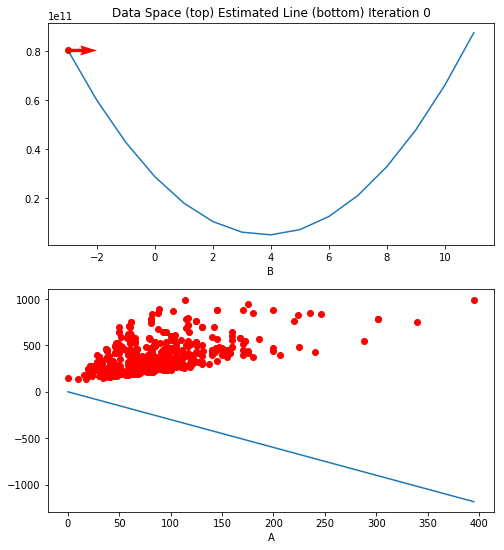

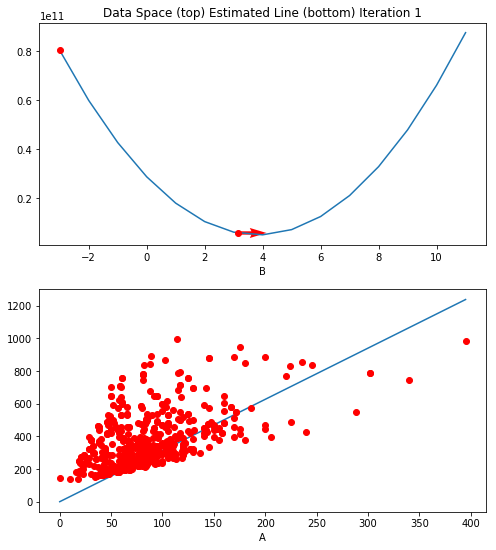

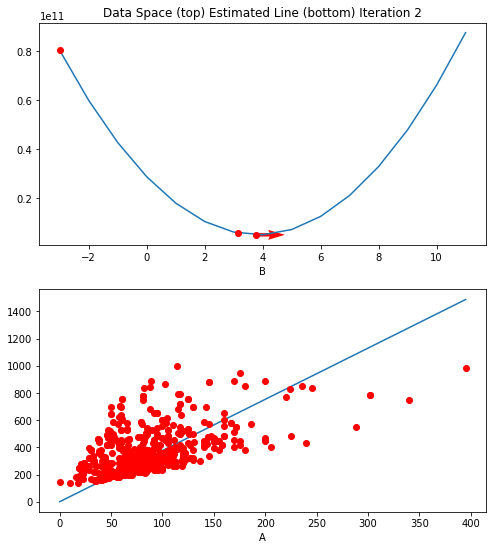

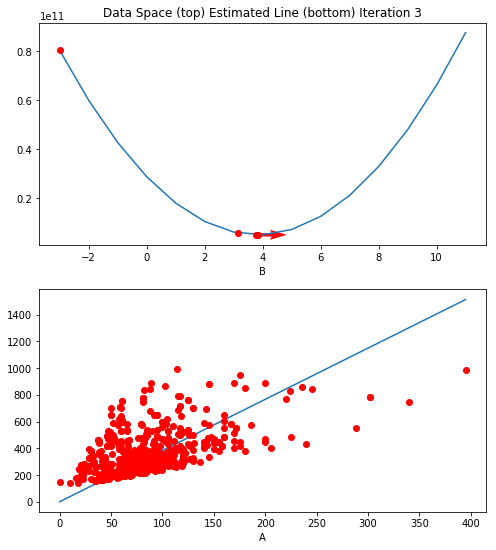

In [27]:
# Type your code here
theta_opt = house_train_model(theta_1,4)

**Question 6:** 
- Print the optimal $\theta$. 
- Predict the price of a house having an area of 330 using the calculated value of optimal $\theta$. 

In [30]:
# Type your code here
print("The optimal value of theta that minimize cost function is: ", theta_opt)
# Type your code here
print("The predicted price of a 330 m² house is: ", theta_opt*330)

The optimal value of theta that minimize cost function is:  [[3.83829518]]
The predicted price of a 330 m² house is:  [[1266.63740822]]


**Question 7:**  
Plot the cost for each iteration and print the final loss

In [31]:
# Type your code here
print('The final loss is: ', LOSS[-1])

The final loss is:  847.3476132846923
